# Project: WeRateDogs Data Wrangling and Analysis Project 

## Table of Contents
<ul>
<li><a href="#intro">1 Introduction</a></li>   
<li><a href="#wrangling">2 Data Wrangling</a></li>
    <ul>
        <li><a href = "#flatfile">2.1 Data Importing from Manually Downloaded Flat File</a> </li>
        <li><a href = "#tweepy">2.2 Data Importing Using tweepy</a> </li>
        <ul>
            <li> <a href = "#jsonfile">2.2.1 Query Twitter API</a> </li>
            <li> <a href = "#txtfile">2.2.2 Loading Query Output into DataFrame</a> </li>
        </ul>
        <li><a href = "#request">2.3 Data Importing Using Programmatically Downloaded File</a> </li>
    </ul>
<li><a href="#assess">3 Data Assessing</a></li>
    <ul>
        <li><a href = "#Tarchive">3.1 Twitter Archive Dataframe</a> </li>
        <li><a href = "#Teval">3.2 Tweets Evaluation Dataframe</a> </li>
        <li><a href = "#Tann">3.3 Image Prediction Dataframe</a> </li>
        <li><a href = "#AssessSummary">3.4 Issues Summary</a> </li>
    </ul>
<li><a href="#clean">4 Data Cleaning</a></li>
<li><a href="#save">5 Data Storing</a></li>    
<li><a href="#analysis">6 Data Analysis</a></li>   
    <ul>
        <li><a href = "#analysis_activity">6.1 Monthly Twitter Account Activity</a> </li>
        <li><a href = "#analysis_image">6.2 Number of Images per Tweet</a> </li>
        <li><a href = "#analysis_stage">6.3 Dog Stage</a> </li>
        <li><a href = "#analysis_breed">6.4 Dog Breed</a> </li>
    </ul>
<li><a href="#conclusion">7 Conclusions</a></li>   
</ul>

<a id='intro'></a>
## 1 Introduction
This project is part of Udacity Data Analyst Nano-Degree. The project provide hands-on experience on a typical ETL operation where data is collected from various sources with different methods. Then, the data is assesed and the issues detected are resolved. After that, the final data set is stored in a database. Finally, the final clean data set is analyzed to reach insights supported with visuals using Pandas and Matplotlib.

In [1]:
import pandas as pd
import numpy as np
import requests
import tweepy
import json
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re
import warnings
import datetime
from sqlalchemy import create_engine
from matplotlib import dates as mpl_dates
from matplotlib import rcParams
warnings.simplefilter('ignore')
%matplotlib inline
pd.set_option('display.max_colwidth', -1)

<a id='wrangling'></a>
## 2 Data Wrangling
Data form three different resources are wrangled and loaded into Pandas dataframes. The three data gathering techniques used in this project are:
- Manually downloded flat files
- Query Twitter API using tweepy library
- Programatically downloaded file using requests library

<a id='flatfile'></a>
### 2.1 Data Importing from Manually Downloaded Flat File
the main WeRateDogs twitter account archive is provided as a flat file. The file is manually downloaded in form of `CSV` file (i.e. `twitter-archive-enhanced.csv`). The archive is imported into dataframe `twitter_archive` using pandas `read_csv` function

In [2]:
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


<a id='tweepy'></a>
### 2.2 Data Importing Using tweepy
the following cell represent the code for using tweepy (Twitter API) for collecting rest of tweets data for tweets with the `tweet_id` in the `tweet_archive` dataframe. the data acquired is then written on a (`txt`) data file which is later read and loaded into `pandas` dataframe

<a id='txtfile'></a>
#### 2.2.1 Query Twitter API
Using the field `tweet_id` the Twitter API is queried to load the entire tweet `JSON` file. The queried `JSON` files are then saved into a text file `tweet_json.txt` file.

In [ ]:
try:
    eval('consumer_key =')
    #consumer_secret = 
   # access_token = 
   # access_secret =

    # setting the tweepy api object
    auth = OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_token, access_secret)
    api = tweepy.API(auth, wait_on_rate_limit=True)

    # NOTE TO REVIEWER: this student had mobile verification issues so the following
    # Twitter API code was sent to this student from a Udacity instructor
    # Tweet IDs for which to gather additional data via Twitter's API
    tweet_ids = twitter_archive.tweet_id.values
    len(tweet_ids)

    # Query Twitter's API for JSON data for each tweet ID in the Twitter archive
    count = 0
    fails_dict = {}
    # Save each tweet's returned JSON as a new line in a .txt file
    with open('tweet_json.txt', 'w') as outfile:
        # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
        for tweet_id in tweet_ids:
            count += 1
            print(str(count) + ": " + str(tweet_id))
            try:
                tweet = api.get_status(tweet_id, tweet_mode='extended')
                print("Success")
                json.dump(tweet._json, outfile)
                outfile.write('\n')
            except tweepy.TweepError as e:
                print("Fail")
                fails_dict[tweet_id] = e
                pass
except:
    print(' NOTE TO REVIEWER: This student had mobile verification issues so the following Twitter API code was sent to this student from a Udacity instructor Tweet IDs for which to gather additional data via Twitter\'s API')

<a id='jsonfile'></a>
#### 2.2.2 Loading Query Output into DataFrame
The next step is to load the created text file `tweet_json.txt` into a pandas dataframe `twitter_eval` by reading this file line by line. 

In [4]:
df_list = []
with open('tweet-json.txt','r') as json_file:
    for line in json_file:
        data = json.loads(line)
        tweet_id = data['id']
        retweet_count=data['retweet_count']
        favorite_count = data['favorite_count']
        df_list.append({'tweet_id':tweet_id,
                       'retweet_count': retweet_count,
                       'favorite_count': favorite_count})

        
twitter_eval = pd.DataFrame(df_list)
twitter_eval.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


<a id='request'></a>
### 2.3 Data ImPorting Using Programmatically Downloaded File
download data from given url using `requests` library, write it into a flat file, and then load it into pandas dataframe `twitter_ann`.

In [5]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
file_name = url.split('/')[-1]
if not os.path.exists(file_name):
    response = requests.get(url)
    with open(file_name,'wb') as file:
        file.write(response.content)
twitter_ann = pd.read_csv(file_name, sep ='\t')
twitter_ann.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


<a id='assess'></a>
## 3 Data Assessing
The three created dataframes are visually and programmatically assessed for quality and tidiness issues 
the following three sub-titles represent the effort done to assess and identify data issues in the three dataframes
the forth sub-title represent a comprehensive assessment report for all issues categorized by type and divided per each table.

<a id='Tarchive'></a>
### 3.1 `twitter_archive` Dataframe
The first dataframe containing the `WeRateDogs` twitter account archive is evaluated and the issues discovered are noted.

In [6]:
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


In [7]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [8]:
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [9]:
#check if there is any non-original tweets (re-tweets)
twitter_archive.retweeted_status_id.notnull().value_counts()

False    2175
True     181 
Name: retweeted_status_id, dtype: int64

In [10]:
#check if any rating numerator is equal to zero. (according to database schema, it can be more than 10)
twitter_archive[twitter_archive.rating_numerator==0]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
315,835152434251116546,NaN,NaN,2017-02-24 15:40:31 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/835152434251116546/photo/1,https://twitter.com/dog_rates/status/835152434251116546/photo/1,https://twitter.com/dog_rates/status/835152434251116546/photo/1",0,10,None,None,None,None,None
1016,746906459439529985,7.468859e+17,4.196984e+09,2016-06-26 03:22:31 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","PUPDATE: can't see any. Even if I could, I couldn't reach them to pet. 0/10 much disappointment https://t.co/c7WXaB2nqX",NaN,NaN,NaN,https://twitter.com/dog_rates/status/746906459439529985/photo/1,0,10,None,None,None,None,None


In [11]:
#check denominator data range 
twitter_archive.rating_denominator.value_counts()

10     2333
11     3   
50     3   
80     2   
20     2   
2      1   
16     1   
40     1   
70     1   
15     1   
90     1   
110    1   
120    1   
130    1   
150    1   
170    1   
7      1   
0      1   
Name: rating_denominator, dtype: int64

In [12]:
#check the number of rating_denominator that exceeds the value 10
twitter_archive[twitter_archive.rating_denominator > 10].shape[0]

20

In [13]:
# check the values in name column
twitter_archive.name.value_counts()

None       745
a          55 
Charlie    12 
Cooper     11 
Oliver     11 
           .. 
Marq       1  
Lassie     1  
Blakely    1  
Jaycob     1  
Baron      1  
Name: name, Length: 957, dtype: int64

the results of above check shows two interesting findings first is `None` entry with 745 occurance also there are some entries that doesn't represent dog names and the common element is starting with lowercase character. a value count of all names starting with a lowercase character showed that all of them are not dog names

In [14]:
twitter_archive.name.value_counts().iloc[[x[0].islower() for x in list(twitter_archive.name.value_counts().index)]]

a               55
the             8 
an              7 
very            5 
quite           4 
one             4 
just            4 
actually        2 
not             2 
getting         2 
mad             2 
his             1 
officially      1 
such            1 
my              1 
life            1 
incredibly      1 
light           1 
old             1 
space           1 
by              1 
unacceptable    1 
all             1 
infuriating     1 
this            1 
Name: name, dtype: int64

In [15]:
#check if any duplicated records are avialable in this dataframe
twitter_archive.duplicated().sum()

0

<a id='Teval'></a>
### 3.2 Tweets Evaluation Dataframe 
The dataframe containing the tweets interaction evaluations (i.e. retweets and favorites) are evaluated and issues are noted.

In [16]:
twitter_eval.sample()

,tweet_id,retweet_count,favorite_count
116,870063196459192321,8840,37771


In [17]:
twitter_eval.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [18]:
twitter_eval.describe()

,tweet_id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


We need to check if every tweeter index in 'twitter_eval' dataframe is available in 'twitter_archive' dataframe

In [19]:
checklist1=[]
archive_ids = list(twitter_archive.tweet_id)
for tweet in list(twitter_eval.tweet_id):
    checklist1.append(tweet in archive_ids)
sum(checklist1)== twitter_eval.tweet_id.count()

True

Now, we should check for tweeter id(s) that is not included in the `twitter_eval` dataframe and is included in `twitter_archive` dataframe. the results shows that the two tweets that are not included are re-tweets. these retweets will be removed anyway as they violate the schema rule of `twitter_archive` dataframe

In [20]:
checklist2=[]
eval_ids = list(twitter_eval.tweet_id)
for tweet in list(twitter_archive.tweet_id):
    checklist2.append(tweet not in eval_ids)
twitter_archive[checklist2]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Canela. She attempted some fancy porch pics. They were unsuccessful. 13/10 someone help her https://t.co/cLyzpcUcMX,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,"https://twitter.com/dog_rates/status/887473957103951883/photo/1,https://twitter.com/dog_rates/status/887473957103951883/photo/1,https://twitter.com/dog_rates/status/887473957103951883/photo/1,https://twitter.com/dog_rates/status/887473957103951883/photo/1",13,10,Canela,None,None,None,None
815,771004394259247104,NaN,NaN,2016-08-31 15:19:06 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @katieornah: @dog_rates learning a lot at college 12/10 for my professor thank u for the pupper slides https://t.co/nTFDr99hg0,7.710021e+17,1.732729e+09,2016-08-31 15:10:07 +0000,"https://twitter.com/katieornah/status/771002130450743296/photo/1,https://twitter.com/katieornah/status/771002130450743296/photo/1",12,10,None,None,None,pupper,None


In [21]:
#check if any duplicated records are avialable in this dataframe
twitter_eval.duplicated().sum()

0

<a id='Tann'></a>
###  3.3 Image Prediction Dataframe
The dataframe that contains the dog breed predictions based on the images uploaded to each tweet (`twitter_ann`) is evaluated and issues are noted.

In [22]:
twitter_ann.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1937,860276583193509888,https://pbs.twimg.com/media/C_BQ_NlVwAAgYGD.jpg,1,lakeside,0.312299,False,dock,0.159842,False,canoe,0.070795,False
1385,766008592277377025,https://pbs.twimg.com/media/CqFouXOXYAAYpzG.jpg,1,Welsh_springer_spaniel,0.728153,True,basset,0.103842,True,Brittany_spaniel,0.062414,True
1192,739979191639244800,https://pbs.twimg.com/media/CkTvJTdXAAAEfbT.jpg,1,Irish_water_spaniel,0.285800,True,wig,0.240653,False,toy_poodle,0.074914,True
376,673148804208660480,https://pbs.twimg.com/media/CVeBQwiUsAAqhLw.jpg,1,tub,0.873010,False,bathtub,0.091434,False,toilet_seat,0.025456,False
810,692187005137076224,https://pbs.twimg.com/media/CZskaEIWIAUeTr5.jpg,2,Siberian_husky,0.810592,True,malamute,0.119745,True,Eskimo_dog,0.029265,True


In [23]:
twitter_ann.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [24]:
#check if all tweet_id in twitter_ann is available in twitter_archive dataframe
checklist3=[]
archive_ids = list(twitter_archive.tweet_id)
for tweet in list(twitter_ann.tweet_id):
    checklist3.append(tweet in archive_ids)
sum(checklist3)== twitter_ann.tweet_id.count()

True

In [25]:
#check if any duplicated records are avialable in this dataframe
twitter_ann.duplicated().sum()

0

<a id='AssessSummary'></a>
###  3.4 Issues Summary
Below is a summary of all data quality and tidiness issues found in the three dataframes.

#### 3.4.1 quality issues
##### 3.4.1.1 `twitter_archive` dataframe
`timestamp` column has a data type of a string while it should be a datetime object.<br>
`timestamp` column doesn't have proper timestamp structure.<br>
`retweeted_status_timestamp`column has a data type of a string while it should be a datetime object.<br>
`twitter_id` column has a `int64` data type where it should be a string.<br>
`retweeted_status_id` shows some tweets that shows retweets violating the schema rule of this database (only original tweets).<br>
`in_reply_to_status_id` shows some tweets that shows retweets violating the schema rule of this database (only original tweets).<br>
`rating_numerator` column is equal to zero in two tweets.<br>
`rating_denominator` column has values that needs further investigation. values greater than 10(20 tweets) & values equal to zero.<br>
`name` column has names that can't be dog names. all of these names starts with a lowercase character except None entry.<br>
`twitter_id` contains some records that doesn't have images which violates dataframe schema.<br>
`expanded_urls` has missing records.<br>
##### 3.4.1.2 `twitter_eval` dataframe
`twitter_id` column has a `int64` data type while it should be a string.<br>
##### 3.4.1.3 `twitter_ann` dataframe
`twitter_id` column has a `int64` data type while it should be a string.<br>
`twitter_id` column has records representing retweets or replies. This issue was detected during cleaning process.<br>

#### 3.4.2 tidiness issues
##### 3.4.2.1 `twitter_archive` dataframe
`doggo`, `floofer`, `pupper` & `puppo` column names are values. column name should be a variable not values.<br>
`text` column has a text and url in it. every column should have one variable<br>
##### 3.4.2.2 `twitter_eval` dataframe
this dataframe forms a single observational unit with  `twitter_archive` dataframe.<br>
##### 3.4.2.3 `twitter_ann` dataframe
the structure of the dataframe is not tidy. `p*`, `P*_conf`, `P*_dog` can be re-arranged to represent more clear variables.<br>

<a id='clean'></a>
## 4. Data Cleaning
The previous data quality and tidiness issues previously discovered in the three dataframes are resolved in this section. The data cleaning process starts with copy the initial state of all dataframes. Then, each issue is resolved in a define, code and test schema. The first part of this schema defines the issues and how it will be solved. The second part is coding the solution and run this code. Finally, the data is reviewed to ensure the desired modification has been made.

### 4.1 save & copy dataframes
the first step of this analysis is to save the collected dataframe in the uncleaned status as `.csv` files and make copy of it in the jupyter notebook to start cleaning process.

In [26]:
# saving initial dataframes as back-up
twitter_archive.to_csv('twitter_archive.csv',index = False)
twitter_eval.to_csv('twitter_eval.csv',index=False)
twitter_ann.to_csv('twitter_ann.csv',index=False)
# copying the initial data frames into new dataframes with short names
archive = twitter_archive.copy()
share = twitter_eval.copy()
image = twitter_ann.copy()

### 4.2 Join `archive` & `share` dataframes (solve 1 tidiness issue)
#### Define
the first step of cleaning process was selected to be solving the tidiness issue of `twitter_eval` dataframe by merging it with the `twitter_archive` dataframe. the selected merging method is `inner` on `tweet_id` column. this will remove two records from the `twitter_archive` dataframe which doesn't have `retweet_count` & `favorite_count`. these two records will be removed anyways as they have data validity issues being retweets and not original tweets.

#### Code

In [27]:
archive = pd.merge(archive,share,how='inner',on='tweet_id')

#### Test

In [28]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2354 entries, 0 to 2353
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2354 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2354 non-null   object 
 4   source                      2354 non-null   object 
 5   text                        2354 non-null   object 
 6   retweeted_status_id         179 non-null    float64
 7   retweeted_status_user_id    179 non-null    float64
 8   retweeted_status_timestamp  179 non-null    object 
 9   expanded_urls               2295 non-null   object 
 10  rating_numerator            2354 non-null   int64  
 11  rating_denominator          2354 non-null   int64  
 12  name                        2354 non-null   object 
 13  doggo                       2354 

as it is shown in the `info()` method of the clean `archive` dataframe that the total number of entries is now `2354` and the number of non-null entries in `retweeted_status_id` was decreased by `2` 

### 4.3 remove retweets & replies (solve 2 quality issues: data validity)
#### Define
this cleaning step was considered to remove the records that represent retweets and replies as they are not original tweets. These records violate the dataframe schema & considered data quality issue with data validity dimension. The removal was performed with logical slicing using `.isnull()` method.

#### Code

In [29]:
archive=archive[archive.retweeted_status_id.isnull()]

#### Test

In [30]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2353
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2175 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2175 non-null   object 
 4   source                      2175 non-null   object 
 5   text                        2175 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2117 non-null   object 
 10  rating_numerator            2175 non-null   int64  
 11  rating_denominator          2175 non-null   int64  
 12  name                        2175 non-null   object 
 13  doggo                       2175 

#### Define

The `retweeted_status_id`, `retweeted_status_user_id` & `retweeted_status_timestamp` are no longer needed in the dataframe & should be removed using `.drop()` method.

#### Code

In [31]:
archive.drop(columns=['retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'],inplace=True)

#### Test

In [32]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2353
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               2175 non-null   int64  
 1   in_reply_to_status_id  78 non-null     float64
 2   in_reply_to_user_id    78 non-null     float64
 3   timestamp              2175 non-null   object 
 4   source                 2175 non-null   object 
 5   text                   2175 non-null   object 
 6   expanded_urls          2117 non-null   object 
 7   rating_numerator       2175 non-null   int64  
 8   rating_denominator     2175 non-null   int64  
 9   name                   2175 non-null   object 
 10  doggo                  2175 non-null   object 
 11  floofer                2175 non-null   object 
 12  pupper                 2175 non-null   object 
 13  puppo                  2175 non-null   object 
 14  retweet_count          2175 non-null   int64  
 15  favo

#### Define
As it's shown in the `.info()` method result above, we still have 78 records that are not original tweets, they are replies. The same previous step is repeated using the `.isnull()` method. 

#### Code

In [33]:
archive=archive[archive.in_reply_to_status_id.isnull()]

#### Test

In [34]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2353
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               2097 non-null   int64  
 1   in_reply_to_status_id  0 non-null      float64
 2   in_reply_to_user_id    0 non-null      float64
 3   timestamp              2097 non-null   object 
 4   source                 2097 non-null   object 
 5   text                   2097 non-null   object 
 6   expanded_urls          2094 non-null   object 
 7   rating_numerator       2097 non-null   int64  
 8   rating_denominator     2097 non-null   int64  
 9   name                   2097 non-null   object 
 10  doggo                  2097 non-null   object 
 11  floofer                2097 non-null   object 
 12  pupper                 2097 non-null   object 
 13  puppo                  2097 non-null   object 
 14  retweet_count          2097 non-null   int64  
 15  favo

#### Define
the `in_reply_to_status_id`,`in_reply_to_user_id` are no longer needed in the dataframe & should be removed.

#### Code

In [35]:
archive.drop(columns=['in_reply_to_status_id','in_reply_to_user_id'],inplace=True)

#### Test

In [36]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2353
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2097 non-null   int64 
 1   timestamp           2097 non-null   object
 2   source              2097 non-null   object
 3   text                2097 non-null   object
 4   expanded_urls       2094 non-null   object
 5   rating_numerator    2097 non-null   int64 
 6   rating_denominator  2097 non-null   int64 
 7   name                2097 non-null   object
 8   doggo               2097 non-null   object
 9   floofer             2097 non-null   object
 10  pupper              2097 non-null   object
 11  puppo               2097 non-null   object
 12  retweet_count       2097 non-null   int64 
 13  favorite_count      2097 non-null   int64 
dtypes: int64(5), object(9)
memory usage: 245.7+ KB


### 4.4 remove tweets without images in `archive` dataframe (solve 1 quality issue: data validity)
#### Define
the clean `archive` dataframe now has 2097 original tweets. the next step is to check which of these tweets has images in the `image` dataframe. tweets without images is considered a data quality issue and should be removed. A logical mask is created as `True` for tweets that exist in both dataframe & `False` elsewhere. Then, logical slicing is applied to remove the `False` records.

#### Code

In [37]:
#create a boolan list of tweets where it's True if the tweet is in the image dataframe and False elsewhere.
original_tweet = list(archive.tweet_id)
checklist4 = []
for tweet in original_tweet:
    checklist4.append(tweet in list(image.tweet_id))

#remove tweets without image from archive dataframe
archive = archive.iloc[checklist4]

#### Test

In [38]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2353
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            1971 non-null   int64 
 1   timestamp           1971 non-null   object
 2   source              1971 non-null   object
 3   text                1971 non-null   object
 4   expanded_urls       1971 non-null   object
 5   rating_numerator    1971 non-null   int64 
 6   rating_denominator  1971 non-null   int64 
 7   name                1971 non-null   object
 8   doggo               1971 non-null   object
 9   floofer             1971 non-null   object
 10  pupper              1971 non-null   object
 11  puppo               1971 non-null   object
 12  retweet_count       1971 non-null   int64 
 13  favorite_count      1971 non-null   int64 
dtypes: int64(5), object(9)
memory usage: 231.0+ KB


It is worth noting that the incompleteness issue of `expanded_urls` column doesn't exist anymore after solving the previous data validity issues

### 4.5 remove retweets & replies from  `image` dataframe (solve 1 quality issue: data validity)
#### Define
As it is noticed, the `archive` dataframe now has 1971 records of valid tweets (i.e. original tweets with images) while the `image` dataframe has 2075 records of tweets with images. This indicates a quality issue of data validity. the records in `image` dataframe that are not original tweets must be removed to assist the anticipated analysis effort. The same previous logical slicing is repeated to exclude records in `image` dataframe that doesn't exist in `archive` dataframe.

#### Code

In [39]:
#Mark the valid tweets in `image` dataframe
valid_tweet = list(archive.tweet_id)
checklist5 = []
for tweet in list(image.tweet_id):
    checklist5.append(tweet in valid_tweet)

#Remove invalid records from `image` dataframe
image = image.iloc[checklist5]

#### Test

In [40]:
image.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  1971 non-null   int64  
 1   jpg_url   1971 non-null   object 
 2   img_num   1971 non-null   int64  
 3   p1        1971 non-null   object 
 4   p1_conf   1971 non-null   float64
 5   p1_dog    1971 non-null   bool   
 6   p2        1971 non-null   object 
 7   p2_conf   1971 non-null   float64
 8   p2_dog    1971 non-null   bool   
 9   p3        1971 non-null   object 
 10  p3_conf   1971 non-null   float64
 11  p3_dog    1971 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 159.8+ KB


### 4.6 modify `doggo`, `floofer`, `pupper` & `puppo` to represent variable not value (solve 1 tidiness issue)
Before performing this step, further investigation will be performed. A subset of the original `archive` dataframe is created. Then, a `age_count` column is created to count the age categories assigned to each tweet using the data given in `doggo`, `floofer`, `pupper` & `puppo` columns.

In [41]:
#create a sub_dataframe from `archive` dataframe
archive_sub1=archive[['tweet_id','text','doggo','floofer','pupper','puppo']]
#count the number of dog_age terms assigned to each tweet
age_count = []
for index, row in archive_sub1.iterrows():
    count = bool(row['doggo']!='None')+bool(row['floofer']!='None')+bool(row['pupper']!='None')+bool(row['puppo']!='None')
    age_count.append(count)
archive_sub1['age_count']=age_count
archive_sub1.age_count.value_counts()

0    1668
1    293 
2    10  
Name: age_count, dtype: int64

The previous analysis shows that 1668 tweets with no age term, 10 tweets with two age terms & 293 tweets with one age term. in the next two cells we will visualize 5 of the tweets  with no age category & with two age category to visually evaluate the tweet text

In [42]:
archive_sub1[archive_sub1.age_count==2]

,tweet_id,text,doggo,floofer,pupper,puppo,age_count
190,855851453814013952,Here's a puppo participating in the #ScienceMarch. Cleverly disguising her own doggo agenda. 13/10 would keep the planet habitable for https://t.co/cMhq16isel,doggo,None,None,puppo,2
199,854010172552949760,"At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs https://t.co/TXdT3tmuYk",doggo,floofer,None,None,2
459,817777686764523521,"This is Dido. She's playing the lead role in ""Pupper Stops to Catch Snow Before Resuming Shadow Box with Dried Apple."" 13/10 (IG: didodoggo) https://t.co/m7isZrOBX7",doggo,None,pupper,None,2
530,808106460588765185,Here we have Burke (pupper) and Dexter (doggo). Pupper wants to be exactly like doggo. Both 12/10 would pet at same time https://t.co/ANBpEYHaho,doggo,None,pupper,None,2
574,801115127852503040,This is Bones. He's being haunted by another doggo of roughly the same size. 12/10 deep breaths pupper everything's fine https://t.co/55Dqe0SJNj,doggo,None,pupper,None,2
704,785639753186217984,This is Pinot. He's a sophisticated doggo. You can tell by the hat. Also pointier than your average pupper. Still 10/10 would pet cautiously https://t.co/f2wmLZTPHd,doggo,None,pupper,None,2
887,759793422261743616,"Meet Maggie &amp; Lila. Maggie is the doggo, Lila is the pupper. They are sisters. Both 12/10 would pet at the same time https://t.co/MYwR4DQKll",doggo,None,pupper,None,2
954,751583847268179968,Please stop sending it pictures that don't even have a doggo or pupper in them. Churlish af. 5/10 neat couch tho https://t.co/u2c9c7qSg8,doggo,None,pupper,None,2
1061,741067306818797568,This is just downright precious af. 12/10 for both pupper and doggo https://t.co/o5J479bZUC,doggo,None,pupper,None,2
1111,733109485275860992,"Like father (doggo), like son (pupper). Both 12/10 https://t.co/pG2inLaOda",doggo,None,pupper,None,2


Reviewing the tweet text alongside with the count, reveals that these tweets either contains two dogs or contains a dog with two age categories assigned. for sake of better representation, the two age categories will be joined and separated by `_`. Next step is to review tweets with no age categories

In [43]:
archive_sub1[archive_sub1.age_count==0]

,tweet_id,text,doggo,floofer,pupper,puppo,age_count
0,892420643555336193,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,None,None,None,None,0
1,892177421306343426,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",None,None,None,None,0
2,891815181378084864,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,None,None,None,None,0
3,891689557279858688,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,None,None,None,None,0
4,891327558926688256,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",None,None,None,None,0
...,...,...,...,...,...,...,...
2349,666049248165822465,Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,None,None,None,None,0
2350,666044226329800704,This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,None,None,None,None,0
2351,666033412701032449,Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,None,None,None,None,0
2352,666029285002620928,This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,None,None,None,None,0


reviewing the sample text of these tweets, it shows that no age categories were assigned to the dog. Thus, we can consider it incomplete data with no records to complete it. as other data is actually how the `WeRateDogs` would classify the dog age.
#### Define
Thus, the complete cleaning process would be creating `dog_age` column. Then, assign a null value for tweets without any age category & a joined category (two categories separated by `_`) for records with two age categories. the next two cells represent the code and test of this step

#### Code

In [44]:
#replace all None entry with empty string
archive_sub1[['doggo','floofer','pupper','puppo']]=archive_sub1[['doggo','floofer','pupper','puppo']].replace('None','')
#create dog_age list as stated above
dog_age=[]
age_category = ['doggo','floofer','pupper','puppo']
for index,row in archive_sub1.iterrows():
    aggregate=[]
    for cat in age_category:
        if row[cat]!='':
            aggregate.append(row[cat])
    sep ='_'
    age = sep.join(aggregate)
    dog_age.append(age)
archive_sub1['dog_age']=dog_age
archive_sub1['dog_age']=archive_sub1['dog_age'].replace('',np.nan) 

#### Test

In [45]:
archive_sub1.dog_age.value_counts()

pupper           201
doggo            63 
puppo            22 
doggo_pupper     8  
floofer          7  
doggo_puppo      1  
doggo_floofer    1  
Name: dog_age, dtype: int64

#### Define
At this stage the `archive_sub1` dataframe is only needed with two columns `tweet_id` & `dog_age`. Thus, the rest of the columns will be dropped. Also, it is better to rename `dog_age` column to `dog_stage` to prevent confusion.

#### Code

In [46]:
archive_sub1.drop(columns=['pupper','doggo','puppo','floofer','age_count','text'],inplace=True)
archive_sub1=archive_sub1.rename(columns={'dog_age':'dog_stage'})

#### Test

In [47]:
archive_sub1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2353
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet_id   1971 non-null   int64 
 1   dog_stage  303 non-null    object
dtypes: int64(1), object(1)
memory usage: 46.2+ KB


#### Define
The step after that is to merge `archive` dataframe to `archive_sub1` dataframe on `tweet_id` column. Then, drop `doggo`, `floofer`, `pupper` & `puppo` columns. the resultant `archive` dataframe will have `dog_stage` column to represent entries provided by the dropped columns in a tidy way.

#### Code

In [48]:
archive = pd.merge(archive, archive_sub1, how='left',on='tweet_id')
archive.drop(columns=['pupper','doggo','puppo','floofer'],inplace=True)

#### Test

In [49]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 1970
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            1971 non-null   int64 
 1   timestamp           1971 non-null   object
 2   source              1971 non-null   object
 3   text                1971 non-null   object
 4   expanded_urls       1971 non-null   object
 5   rating_numerator    1971 non-null   int64 
 6   rating_denominator  1971 non-null   int64 
 7   name                1971 non-null   object
 8   retweet_count       1971 non-null   int64 
 9   favorite_count      1971 non-null   int64 
 10  dog_stage           303 non-null    object
dtypes: int64(5), object(6)
memory usage: 184.8+ KB


### 4.7 split the data in `text` column in `archive` dataframe (solve 1 tidiness issue)
#### Define
The entries in the text column represent a tweet text and shortened url. the data will be splitted into separated columns with name `text` and `short_url`. This analysis will consider shortened & expanded url as two different variables. Thus, both `short_url` and `expanded_url` will be kept here.

#### Code

In [50]:
archive=archive.rename(columns={'text':'issue'})
archive['text']=archive.issue.str.extract(r'(.*\n*.*)\s(?:https://).*')
archive['short_urls']=archive.issue.str.extract(r'.*\s((?:https://).*)')
archive.drop(columns=['issue'],inplace=True)

##### Test

In [51]:
archive.head()

,tweet_id,timestamp,source,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,dog_stage,text,short_urls
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,8853,39467,NaN,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10,https://t.co/MgUWQ76dJU
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,6514,33819,NaN,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10",https://t.co/0Xxu71qeIV
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,4328,25461,NaN,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10,https://t.co/wUnZnhtVJB
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,8964,42908,NaN,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us,https://t.co/tD36da7qLQ
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,9774,41048,NaN,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek",https://t.co/AtUZn91f7f


### 4.8 clean `name` column (solve 2 data quality issue: completeness and accuracy)
`name` column in `archive` dataframe has records that are not valid dog names. previous investigation showed that `None` entry is used for alot of records. Also other faulty names exist and all shares the commnon feature which is starting with lowercase letter.<br>
The first step of cleaning process is to make a list of all invalid names and their count.

In [52]:
name_issue = archive.name.value_counts().iloc[[(x[0].islower()or x=='None')for x in list(archive.name.value_counts().index)]]
name_issue

None            524
a               55 
the             7  
an              6  
very            4  
one             4  
quite           3  
just            3  
getting         2  
his             1  
my              1  
officially      1  
such            1  
light           1  
actually        1  
incredibly      1  
space           1  
infuriating     1  
this            1  
unacceptable    1  
by              1  
not             1  
all             1  
Name: name, dtype: int64

A sub_dataframe is created from `archive` dataframe.

In [53]:
archive_sub2 = archive[['tweet_id','name','text','short_urls']]

#### Define
Then the wrong names of single time occurance is checked first. the following cells represents the code and test for solving the issues of these names. the choice to go manually is made as the case may vary from one entry to another(i.e. not all time it is granted that the tweet has no name) as it is the case with `his` entry.
This Definition is the same for the coming codes so it will not be repeated

#### Code

In [54]:
archive_sub2[archive_sub2.name=='his']
archive_sub2.name=archive_sub2.name.replace('his','Quizno')

#### Test

In [55]:
sum(archive_sub2.name=='his')

0

#### Code

In [56]:
archive_sub2[archive_sub2.name=='unacceptable']
archive_sub2.name=archive_sub2.name.replace('unacceptable',np.nan)

#### Test

In [57]:
sum(archive_sub2.name=='unacceptable')

0

#### Code

In [58]:
archive_sub2[archive_sub2.name=='officially']
archive_sub2.name=archive_sub2.name.replace('officially',np.nan)

#### Test

In [59]:
sum(archive_sub2.name=='officially')

0

#### Code

In [60]:
archive_sub2[archive_sub2.name=='by']
archive_sub2.name=archive_sub2.name.replace('by',np.nan)

#### Test

In [61]:
sum(archive_sub2.name=='by')

0

#### Code

In [62]:
archive_sub2[archive_sub2.name=='all']
archive_sub2.name=archive_sub2.name.replace('all',np.nan)

#### Test

In [63]:
sum(archive_sub2.name=='all')

0

#### Code

In [64]:
archive_sub2[archive_sub2.name=='light']
archive_sub2.name=archive_sub2.name.replace('light',np.nan)

#### Test

In [65]:
sum(archive_sub2.name=='light')

0

#### Code

In [66]:
archive_sub2[archive_sub2.name=='such']
#inspecting the instgram user name found in the tweet text. it suggests that the dog name is Roxy
archive_sub2.name=archive_sub2.name.replace('such','Roxy')

#### Test

In [67]:
sum(archive_sub2.name=='such')

0

#### Code

In [68]:
archive_sub2[archive_sub2.name=='actually']
archive_sub2.name=archive_sub2.name.replace('actually',np.nan)

#### Test

In [69]:
sum(archive_sub2.name=='actually')

0

#### Code

In [70]:
archive_sub2[archive_sub2.name=='not']
archive_sub2.name=archive_sub2.name.replace('not',np.nan)

#### Test

In [71]:
sum(archive_sub2.name=='not')

0

#### Code

In [72]:
archive_sub2[archive_sub2.name=='my']
archive_sub2.name=archive_sub2.name.replace('my','Zoey')

#### Test

In [73]:
sum(archive_sub2.name=='my')

0

#### Code

In [74]:
archive_sub2[archive_sub2.name=='this']
archive_sub2.name=archive_sub2.name.replace('this',np.nan)

#### Test

In [75]:
sum(archive_sub2.name=='this')

0

#### Code

In [76]:
archive_sub2[archive_sub2.name=='space']
archive_sub2.name=archive_sub2.name.replace('space',np.nan)

#### Test

In [77]:
sum(archive_sub2.name=='space')

0

#### Code

In [78]:
archive_sub2[archive_sub2.name=='incredibly']
archive_sub2.name=archive_sub2.name.replace('incredibly',np.nan)

#### Test

In [79]:
sum(archive_sub2.name=='incredibly')

0

#### Code

In [80]:
archive_sub2[archive_sub2.name=='infuriating']
archive_sub2.name=archive_sub2.name.replace('infuriating',np.nan)

#### Test

In [81]:
sum(archive_sub2.name=='infuriating')

0

#### Code

In [82]:
archive_sub2[archive_sub2.name=='getting']
archive_sub2.name=archive_sub2.name.replace('getting',np.nan)

#### Test

In [83]:
sum(archive_sub2.name=='getting')

0

#### Code

In [84]:
archive_sub2[archive_sub2.name=='just']
archive_sub2.name=archive_sub2.name.replace('just',np.nan)

#### Test

In [85]:
sum(archive_sub2.name=='just')

0

#### Code

In [86]:
archive_sub2[archive_sub2.name=='quite']
archive_sub2.name=archive_sub2.name.replace('quite',np.nan)

#### Test

In [87]:
sum(archive_sub2.name=='quite')

0

#### Code

In [88]:
archive_sub2[archive_sub2.name=='very']
archive_sub2.name=archive_sub2.name.replace('very',np.nan)

#### Test

In [89]:
sum(archive_sub2.name=='very')

0

#### Code

In [90]:
archive_sub2[archive_sub2.name=='one']
archive_sub2.iloc[272]=archive_sub2.iloc[272].replace('one','Grace')
archive_sub2.name=archive_sub2.name.replace('one',np.nan)

#### Test

In [91]:
sum(archive_sub2.name=='one')

0

#### Code

In [92]:
archive_sub2[archive_sub2.name=='an']
archive_sub2.iloc[1823]=archive_sub2.iloc[1823].replace('an','Berta')
archive_sub2.name=archive_sub2.name.replace('an',np.nan)

#### Test

In [93]:
sum(archive_sub2.name=='an')

0

#### Code

In [94]:
archive_sub2[archive_sub2.name=='the']
archive_sub2.name=archive_sub2.name.replace('the',np.nan)

#### Test

In [95]:
sum(archive_sub2.name=='the')

0

In [96]:
archive_sub2[archive_sub2.name=='a']

,tweet_id,name,text,short_urls
49,881536004380872706,a,Here is a pupper approaching maximum borkdrive. Zooming at never before seen speeds. 14/10 paw-inspiring af \n(IG: puffie_the_chow),https://t.co/ghXBIIeQZF
468,792913359805018113,a,Here is a perfect example of someone who has their priorities in order. 13/10 for both owner and Forrest,https://t.co/LRyMrU7Wfq
578,772581559778025472,a,Guys this is getting so out of hand. We only rate dogs. This is a Galapagos Speed Panda. Pls only send dogs... 10/10,https://t.co/8lpAGaZRFn
742,747885874273214464,a,This is a mighty rare blue-tailed hammer sherk. Human almost lost a limb trying to take these. Be careful guys. 8/10,https://t.co/TGenMeXreW
744,747816857231626240,a,Viewer discretion is advised. This is a terrible attack in progress. Not even in water (tragic af). 4/10 bad sherk,https://t.co/L3U0j14N5R
752,746872823977771008,a,This is a carrot. We only rate dogs. Please only send in dogs. You all really should know this by now ...11/10,https://t.co/9e48aPrBm2
777,743222593470234624,a,This is a very rare Great Alaskan Bush Pupper. Hard to stumble upon without spooking. 12/10 would pet passionately,https://t.co/xOBKCdpzaa
912,717537687239008257,a,People please. This is a Deadly Mediterranean Plop T-Rex. We only rate dogs. Only send in dogs. Thanks you... 11/10,https://t.co/2ATDsgHD4n
922,715733265223708672,a,This is a taco. We only rate dogs. Please only send in dogs. Dogs are what we rate. Not tacos. Thank you... 10/10,https://t.co/cxl6xGY8B9
1036,704859558691414016,a,Here is a heartbreaking scene of an incredible pupper being laid to rest. 10/10 RIP pupper,https://t.co/81mvJ0rGRu


#### Define
Assessment of the above dataframe showed a pattern where all of the tweets with `name` entry `a` the tweets with names has a prefix of `named` or `name is` otherwise it doesn't have name at all. this pattern can be used to extract all dog names with proper regular expression while assign `NaN` to records without the detected pattern. The same methodology was decided to be followed with `None` entries as it has so much records to be visually inspected.

#### Code

In [97]:
pattern = re.compile(r'(?:name(?:d)?)\s{1}(?:is\s)?([A-Za-z]+)')
for index, row in archive_sub2.iterrows():  
    if row['name']=='a' or row['name']=='None':
        try:
            dog_name = re.findall(pattern, row['text'])[0]
            archive_sub2.loc[index,'name'] = archive_sub2.loc[index,'name'].replace(row['name'], dog_name)

        except IndexError:
            archive_sub2.loc[index,'name'] = np.nan

#### Test

In [98]:
sum(archive_sub2.name=='a')

0

In [99]:
sum(archive_sub2.name=='None')

0

#### Define
Merge the two dataframes `archive` & `archive_sub2` which contains the correct names & remove the repeated columns to conclude this cleaning step.

#### Code

In [100]:
archive_sub2.drop(columns=['text','short_urls'],inplace=True)
archive_sub2.rename(columns={'name':'c_name'},inplace=True)
archive = pd.merge(archive,archive_sub2,how='inner',on='tweet_id')
archive.drop(columns=['name'],inplace=True)

#### Test

In [101]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 1970
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            1971 non-null   int64 
 1   timestamp           1971 non-null   object
 2   source              1971 non-null   object
 3   expanded_urls       1971 non-null   object
 4   rating_numerator    1971 non-null   int64 
 5   rating_denominator  1971 non-null   int64 
 6   retweet_count       1971 non-null   int64 
 7   favorite_count      1971 non-null   int64 
 8   dog_stage           303 non-null    object
 9   text                1971 non-null   object
 10  short_urls          1971 non-null   object
 11  c_name              1382 non-null   object
dtypes: int64(5), object(7)
memory usage: 200.2+ KB


### 4.9 clean `rating_denominator`  column (solve 1 data quality issue:accuracy)
#### Define
for sake of correct evaluation, all denominator should be 10. Other values is considered errors and need cleaning. A sub_dataframe `archive_sub3` is first created to ease performing this task. Then, a list of all `rating_denominator` that doesn't equal 10.

#### Code

In [102]:
archive_sub3 = archive[['tweet_id','rating_numerator','rating_denominator','text','short_urls']]
rate_issue = archive_sub3.rating_denominator.value_counts().iloc[[x!=10 for x in list(archive_sub3.rating_denominator.value_counts().index)]]

#### Test

In [103]:
rate_issue

50     3
80     2
11     2
170    1
150    1
120    1
110    1
90     1
70     1
40     1
20     1
7      1
2      1
Name: rating_denominator, dtype: int64

#### Define
Inspecting those value we can detect two patterns. first one is denominator that can't be divided by 10 without reminder and second one is denominator that can be divided 10 with zero reminder. the former issue is checked first then the later one.
This Definition is the same for the coming codes so it will not be repeated

#### Code

In [104]:
archive_sub3[archive_sub3.rating_denominator==2]

,tweet_id,rating_numerator,rating_denominator,text,short_urls
1950,666287406224695296,1,2,This is an Albanian 3 1/2 legged Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10,https://t.co/d9NcXFKwLv


In [105]:
archive_sub3.iloc[1950] = archive_sub3.iloc[1950].replace(1,9)
archive_sub3.iloc[1950] = archive_sub3.iloc[1950].replace(2,10)

#### Test

In [106]:
sum(archive_sub3.rating_denominator==2)

0

#### Code

In [107]:
archive_sub3[archive_sub3.rating_denominator==7]

,tweet_id,rating_numerator,rating_denominator,text,short_urls
382,810984652412424192,24,7,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:,https://t.co/98tB8y7y7t https://t.co/LouL5vdvxx


In [108]:
archive_sub3.iloc[382] = archive_sub3.iloc[382].replace(24,np.nan)
archive_sub3.iloc[382] = archive_sub3.iloc[382].replace(7,np.nan)

#### Test

In [109]:
sum(archive_sub3.rating_denominator==7)

0

#### Code

In [110]:
archive_sub3[archive_sub3.rating_denominator==11]

,tweet_id,rating_numerator,rating_denominator,text,short_urls
794,740373189193256964,9.0,11.0,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP",https://t.co/XAVDNDaVgQ
1313,682962037429899265,7.0,11.0,This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10,https://t.co/7EsP8LmSp5


In [111]:
archive_sub3.iloc[794] = archive_sub3.iloc[794].replace(9,14)
archive_sub3.iloc[794] = archive_sub3.iloc[794].replace(11,10)
archive_sub3.iloc[1313] = archive_sub3.iloc[1313].replace(7,10)
archive_sub3.iloc[1313] = archive_sub3.iloc[1313].replace(11,10)

#### Test

In [112]:
sum(archive_sub3.rating_denominator==11)

0

#### Code

In [113]:
for index, row in archive_sub3.iterrows():  
    if row['rating_denominator']!=10 and row['rating_denominator']%10 == 0:
        dogs = row['rating_denominator']/10
        archive_sub3.loc[index,'rating_denominator'] = 10
        archive_sub3.loc[index,'rating_numerator'] = row['rating_numerator']/dogs

#### Test

In [114]:
archive_sub3.rating_denominator.value_counts()

10.0    1970
Name: rating_denominator, dtype: int64

### 4.10 clean `rating_numerator`  column (solve 1 data quality issue:accuracy)
#### Define
Also the database schema should allow rating numerator to be more than the denominator but very low and very high records are suspicious. a list of values that is contained now in `rating_numerator` is created.

In [115]:
archive_sub3.rating_numerator.value_counts()

12.0      450
10.0      420
11.0      397
13.0      253
9.0       151
8.0       95 
7.0       51 
14.0      34 
5.0       33 
6.0       32 
3.0       19 
4.0       15 
2.0       10 
1.0       4  
27.0      1  
0.0       1  
1776.0    1  
26.0      1  
75.0      1  
420.0     1  
Name: rating_numerator, dtype: int64

We can suspect very low and very high values. only records with discovered issues are reported in the next cells.

#### Code

In [116]:
archive_sub3[archive_sub3.rating_numerator==420]

,tweet_id,rating_numerator,rating_denominator,text,short_urls
1696,670842764863651840,420.0,10.0,After so many requests... here you go.\n\nGood dogg. 420/10,https://t.co/yfAAo1gdeY


this tweet shows a picture of a singer and doesn't have a valid dog rating. Thus it is not a valid tweet as per dataframe schema. the rating is marked `np.nan` to be removed later.

In [117]:
archive_sub3.iloc[1696] = archive_sub3.iloc[1696].replace(420,np.nan)

#### Test

In [118]:
sum(archive_sub3.rating_numerator==420)

0

#### Code

In [119]:
archive_sub3[archive_sub3.rating_numerator==75]

,tweet_id,rating_numerator,rating_denominator,text,short_urls
499,786709082849828864,75.0,10.0,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10",https://t.co/yBO5wuqaPS


In [120]:
archive_sub3.iloc[499] = archive_sub3.iloc[499].replace(75,9.75)

#### Test

In [121]:
sum(archive_sub3.rating_numerator==75)

0

#### Code

In [122]:
archive_sub3[archive_sub3.rating_numerator==27]

,tweet_id,rating_numerator,rating_denominator,text,short_urls
549,778027034220126208,27.0,10.0,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back,https://t.co/QFaUiIHxHq


In [123]:
archive_sub3.iloc[549] = archive_sub3.iloc[549].replace(27,11.27)

#### Test

In [124]:
sum(archive_sub3.rating_numerator==27)

0

#### Code

In [125]:
archive_sub3[archive_sub3.rating_numerator==2]

,tweet_id,rating_numerator,rating_denominator,text,short_urls
884,722974582966214656,2.0,10.0,Happy 4/20 from the squad! 13/10 for all,https://t.co/eV1diwds8a
1404,678675843183484930,2.0,10.0,Exotic pup here. Tail long af. Throat looks swollen. Might breathe fire. Exceptionally unfluffy 2/10 would still pet,https://t.co/a8SqCaSo2r
1407,678424312106393600,2.0,10.0,This is Crystal. She's a shitty fireman. No sense of urgency. People could be dying Crystal. 2/10 just irresponsible,https://t.co/rtMtjSl9pz
1545,674265582246694913,2.0,10.0,This is Henry. He's a shit dog. Short pointy ears. Leaves trail of pee. Not fluffy. Doesn't come when called. 2/10,https://t.co/Pu9RhfHDEQ
1701,670826280409919488,2.0,10.0,"Scary dog here. Too many legs. Extra tail. Not soft, let alone fluffy. Won't bark. Moves sideways. Has weapon. 2/10",https://t.co/XOPXCSXiUT
1855,668142349051129856,2.0,10.0,This lil pup is Oliver. Hops around. Has wings but doesn't fly (lame). Annoying chirp. Won't catch tennis balls 2/10,https://t.co/DnhUw0aBM2
1864,667878741721415682,2.0,10.0,This is Tedrick. He lives on the edge. Needs someone to hit the gas tho. Other than that he's a baller. 10&amp;2/10,https://t.co/LvP1TTYSCN
1925,666786068205871104,2.0,10.0,Unfamiliar with this breed. Ears pointy af. Won't let go of seashell. Won't eat kibble. Not very fast. Bad dog 2/10,https://t.co/EIn5kElY1S
1941,666411507551481857,2.0,10.0,This is quite the dog. Gets really excited when not in water. Not very soft tho. Bad at fetch. Can't do tricks. 2/10,https://t.co/aMCTNWO94t
1964,666051853826850816,2.0,10.0,This is an odd dog. Hard on the outside but loving on the inside. Petting still fun. Doesn't play catch well. 2/10,https://t.co/v5A4vzSDdc


In [126]:
archive_sub3.iloc[884] = archive_sub3.iloc[884].replace(2,13)

#### Test

In [127]:
archive_sub3.rating_numerator.iloc[884]

13.0

#### Code

In [128]:
archive_sub3[archive_sub3.rating_numerator==5]

,tweet_id,rating_numerator,rating_denominator,text,short_urls
39,883482846933004288,5.0,10.0,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10",https://t.co/qjrljjt948
526,781661882474196992,5.0,10.0,Who keeps sending in pictures without dogs in them? This needs to stop. 5/10 for the mediocre road,https://t.co/ELqelxWMrC
700,751583847268179968,5.0,10.0,Please stop sending it pictures that don't even have a doggo or pupper in them. Churlish af. 5/10 neat couch tho,https://t.co/u2c9c7qSg8
1089,699691744225525762,5.0,10.0,"This is Dave. He's a tropical pup. Short lil legs (dachshund mix?) Excels underwater, but refuses to eat kibble 5/10",https://t.co/ZJnCxlIf62
1179,691483041324204033,5.0,10.0,When bae says they can't go out but you see them with someone else that same night. 5/10 &amp; 10/10 for heartbroken pup,https://t.co/aenk0KpoWM
1246,687102708889812993,5.0,10.0,Army of water dogs here. None of them know where they're going. Have no real purpose. Aggressive barks. 5/10 for all,https://t.co/A88x73TwMN
1276,684959798585110529,5.0,10.0,This is Jerry. He's a neat dog. No legs (tragic). Has more horns than a dog usually does. Bark is unique af. 5/10,https://t.co/85q7xlplsJ
1281,684880619965411328,5.0,10.0,Here we have a basking dino pupper. Looks powerful. Occasionally shits eggs. Doesn't want the holidays to end. 5/10,https://t.co/DnNweb5eTO
1297,683849932751646720,5.0,10.0,This is Jiminy. He's not the brightest dog. Needs to lay off the kibble. 5/10 still petable,https://t.co/omln4LOy1x
1329,682003177596559360,5.0,10.0,Unique dog here. Wrinkly as hell. Weird segmented neck. Finger on fire. Doesn't seem to notice. 5/10 might still pet,https://t.co/Hy9La4xNX3


In [129]:
archive_sub3.iloc[39] = archive_sub3.iloc[39].replace(5,13.5)

#### Test

In [130]:
archive_sub3.rating_numerator.iloc[39]

13.5

#### Code

In [131]:
archive_sub3[archive_sub3.rating_numerator==26]

,tweet_id,rating_numerator,rating_denominator,text,short_urls
1359,680494726643068929,26.0,10.0,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10,https://t.co/eNm2S6p9BD


In [132]:
archive_sub3.iloc[1359] = archive_sub3.iloc[1359].replace(26,11.26)

#### Test

In [133]:
archive_sub3.rating_numerator.iloc[1359]

11.26

#### Define
Remove record representing tweet about a singer not an actual dog rating

#### Code

In [134]:
archive_sub3=archive_sub3[archive_sub3.rating_numerator.notnull()]

#### Test

In [135]:
archive_sub3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1969 entries, 0 to 1970
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1969 non-null   int64  
 1   rating_numerator    1969 non-null   float64
 2   rating_denominator  1969 non-null   float64
 3   text                1969 non-null   object 
 4   short_urls          1969 non-null   object 
dtypes: float64(2), int64(1), object(2)
memory usage: 92.3+ KB


#### Define
Now, we can merge the original dataframe to the sub_dataframe using `inner` method to remove invalid records discovered during cleaning.

#### Code

In [136]:
archive_sub3.drop(columns=['text','short_urls'],inplace=True)
archive.drop(columns=['rating_numerator','rating_denominator'],inplace=True)
archive = pd.merge(archive,archive_sub3,how='inner',on='tweet_id')

#### Test

In [137]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1969 entries, 0 to 1968
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1969 non-null   int64  
 1   timestamp           1969 non-null   object 
 2   source              1969 non-null   object 
 3   expanded_urls       1969 non-null   object 
 4   retweet_count       1969 non-null   int64  
 5   favorite_count      1969 non-null   int64  
 6   dog_stage           303 non-null    object 
 7   text                1969 non-null   object 
 8   short_urls          1969 non-null   object 
 9   c_name              1381 non-null   object 
 10  rating_numerator    1969 non-null   float64
 11  rating_denominator  1969 non-null   float64
dtypes: float64(2), int64(3), object(7)
memory usage: 200.0+ KB


### 4.11 remove invalid tweets for `image` dataframe: (solve 1 data quality issue)
#### Define
As the rating step showed that two tweets are invalid. one of them doesn't have rating while the other has the image of a singer we need to dump these records from `image` dataframe for further analysis effort. this will be done with logical slicing of `image` dataframe using mask of `tweet_id` column created by comparing this column between `image` and `archive` dataframe

#### Code

In [138]:
valid_tweets = archive.tweet_id
mask=[]
for x in list(image.tweet_id):
    mask.append(x in list(valid_tweets))
image=image[mask]

#### Test

In [139]:
image.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1969 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  1969 non-null   int64  
 1   jpg_url   1969 non-null   object 
 2   img_num   1969 non-null   int64  
 3   p1        1969 non-null   object 
 4   p1_conf   1969 non-null   float64
 5   p1_dog    1969 non-null   bool   
 6   p2        1969 non-null   object 
 7   p2_conf   1969 non-null   float64
 8   p2_dog    1969 non-null   bool   
 9   p3        1969 non-null   object 
 10  p3_conf   1969 non-null   float64
 11  p3_dog    1969 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 159.6+ KB


### 4.12 reshape the `image` dataframe: (solve 1 tidiness issue)
#### Define
`image` dataframe needs changing columns name & re-arrange the data to be more representative. this will be done using `wide_to_long` function from `pandas` dataframe

#### Code

In [140]:
cols = ['tweet_id', 'jpg_url', 'img_num', 
       'breed_1', 'confidence_1', 'is_dog_1',
       'breed_2', 'confidence_2', 'is_dog_2',
       'breed_3', 'confidence_3', 'is_dog_3']
image.columns = cols

In [141]:
image = pd.wide_to_long(image, stubnames=['breed', 'confidence', 'is_dog'], 
    i=['tweet_id', 'jpg_url', 'img_num'], j='prediction_level', sep="_").reset_index()

#### Test

In [142]:
image.head()

,tweet_id,jpg_url,img_num,prediction_level,breed,confidence,is_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,1,Welsh_springer_spaniel,0.465074,True
1,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,2,collie,0.156665,True
2,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,3,Shetland_sheepdog,0.061428,True
3,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,1,redbone,0.506826,True
4,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,2,miniature_pinscher,0.074192,True


### 4.13 modify `breed` column in `image` dataframe: (solve 1 data quality issue)
#### Define
The data in this column is not consistent. some letters are uppercase while others are lowercase. the solution is to set all letters in this column to lowercase letters. This can be achieved with `.lower()` method

#### Code

In [143]:
image.breed = image.breed.str.lower()

#### Test

In [144]:
image.breed.value_counts()

labrador_retriever    264
golden_retriever      263
chihuahua             178
pembroke              138
cardigan              113
                     ... 
knee_pad              1  
hair_slide            1  
monitor               1  
remote_control        1  
parachute             1  
Name: breed, Length: 622, dtype: int64

### 4.14 modify the `timestamp` column in `archive` dataframe
#### Define
The `timestamp` column has `+00:00` attached to the timestamp text. this can be removed before modifying the data type of this column. This can be done by `.split()` method.

#### Code

In [145]:
for index,row in archive.iterrows():
    string = row['timestamp'].strip().split('+')[0]
    archive.loc[index,'timestamp']=archive.loc[index,'timestamp'].replace(row['timestamp'],string)

#### Test

In [146]:
archive.timestamp

0       2017-08-01 16:23:56 
1       2017-08-01 00:17:27 
2       2017-07-31 00:18:03 
3       2017-07-30 15:58:51 
4       2017-07-29 16:00:24 
                ...         
1964    2015-11-16 00:24:50 
1965    2015-11-16 00:04:52 
1966    2015-11-15 23:21:54 
1967    2015-11-15 23:05:30 
1968    2015-11-15 22:32:08 
Name: timestamp, Length: 1969, dtype: object

### 4.15 modify wrong data type of columns in `archive` dataframe
#### Define
Modify all wrong data types of `archive` dataframe

#### Code

In [147]:
archive.tweet_id=archive.tweet_id.astype('str')
archive.timestamp = pd.to_datetime(archive.timestamp)
archive.dog_stage = archive.dog_stage.astype('category')

#### Test

In [148]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1969 entries, 0 to 1968
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            1969 non-null   object        
 1   timestamp           1969 non-null   datetime64[ns]
 2   source              1969 non-null   object        
 3   expanded_urls       1969 non-null   object        
 4   retweet_count       1969 non-null   int64         
 5   favorite_count      1969 non-null   int64         
 6   dog_stage           303 non-null    category      
 7   text                1969 non-null   object        
 8   short_urls          1969 non-null   object        
 9   c_name              1381 non-null   object        
 10  rating_numerator    1969 non-null   float64       
 11  rating_denominator  1969 non-null   float64       
dtypes: category(1), datetime64[ns](1), float64(2), int64(2), object(6)
memory usage: 266.9+ KB


In [149]:
archive.head()

,tweet_id,timestamp,source,expanded_urls,retweet_count,favorite_count,dog_stage,text,short_urls,c_name,rating_numerator,rating_denominator
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",https://twitter.com/dog_rates/status/892420643555336193/photo/1,8853,39467,NaN,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10,https://t.co/MgUWQ76dJU,Phineas,13.0,10.0
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",https://twitter.com/dog_rates/status/892177421306343426/photo/1,6514,33819,NaN,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10",https://t.co/0Xxu71qeIV,Tilly,13.0,10.0
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",https://twitter.com/dog_rates/status/891815181378084864/photo/1,4328,25461,NaN,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10,https://t.co/wUnZnhtVJB,Archie,12.0,10.0
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",https://twitter.com/dog_rates/status/891689557279858688/photo/1,8964,42908,NaN,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us,https://t.co/tD36da7qLQ,Darla,13.0,10.0
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",9774,41048,NaN,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek",https://t.co/AtUZn91f7f,Franklin,12.0,10.0


### 4.16 modify wrong data type of columns in `image` dataframe
#### Define
Modify all wrong data types of `image` dataframe

#### Code

In [150]:
image.tweet_id = image.tweet_id.astype('str')
image.prediction_level = image.prediction_level.astype('category')

#### Test

In [151]:
image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5907 entries, 0 to 5906
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   tweet_id          5907 non-null   object  
 1   jpg_url           5907 non-null   object  
 2   img_num           5907 non-null   int64   
 3   prediction_level  5907 non-null   category
 4   breed             5907 non-null   object  
 5   confidence        5907 non-null   float64 
 6   is_dog            5907 non-null   bool    
dtypes: bool(1), category(1), float64(1), int64(1), object(3)
memory usage: 242.5+ KB


### 4.17 Merge `archive` and `image` dataframes
#### Define

The analysis is based on tweets with image whose 1st prediction is a dog. Thus the cleaning process is divided as follow.<br>
1. Remove all 2nd & 3rd prediction levels from `image` dataframe
2. Drop unnecessary columns (`jpg_url`,`prediction_level`) from `image` dataframe (they are not needed for coming analysis)
3. Drop unnecessary columns (`source`,`expanded_urls`,`short_urls`,`rating_denominator`) from `archive` dataframe (they are not needed for coming analysis)
4. Merge the two dataframes using `merge` function with `inner` join on `tweet_id` column

##### Code

In [152]:
image=image[image.prediction_level == 1]
image.drop(columns=['jpg_url','prediction_level'],inplace=True)
archive.drop(columns=['source','expanded_urls','short_urls','rating_denominator'],inplace=True)
master = pd.merge(archive,image,how='inner',on='tweet_id')

#### Test

In [154]:
master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1969 entries, 0 to 1968
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   tweet_id          1969 non-null   object        
 1   timestamp         1969 non-null   datetime64[ns]
 2   retweet_count     1969 non-null   int64         
 3   favorite_count    1969 non-null   int64         
 4   dog_stage         303 non-null    category      
 5   text              1969 non-null   object        
 6   c_name            1381 non-null   object        
 7   rating_numerator  1969 non-null   float64       
 8   img_num           1969 non-null   int64         
 9   breed             1969 non-null   object        
 10  confidence        1969 non-null   float64       
 11  is_dog            1969 non-null   bool          
dtypes: bool(1), category(1), datetime64[ns](1), float64(2), int64(3), object(4)
memory usage: 173.4+ KB


<a id='save'></a>
## 5. Data Storing
The final clean master dataframe is stored in a database for storage and further analysis if required.

In [155]:
#save as '.csv' file
master.to_csv('twitter_archive_master.csv',index=False)

In [156]:
engine_tweet = create_engine('sqlite:///WeRateDogs.db')

In [157]:
#save as a database
master.to_sql('twitter_archive_master',engine_tweet,index=False)

<a id='analysis'></a>
## 6. Data Analysis
The clan dataset is further analyzed to deliver useful insights. Three main attributes were investigated and visualized in this analysis
- The `WeRateDogs` monthly account activity in terms of number of tweets and the engagement achieved monthly. The engagement was evaluated based on the number of retweets and favorites
- The effect of various parameters on the acount rating of the dogs. The parameters involved were the dog stage, breed and the number of images of the dog 
- The effect of the last three parameters on the number of tweets and favorites (i.e. account engagement) was also investigated.

In [158]:
analysis = pd.read_csv('twitter_archive_master.csv')

In [159]:
analysis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1969 entries, 0 to 1968
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   tweet_id          1969 non-null   int64  
 1   timestamp         1969 non-null   object 
 2   retweet_count     1969 non-null   int64  
 3   favorite_count    1969 non-null   int64  
 4   dog_stage         303 non-null    object 
 5   text              1969 non-null   object 
 6   c_name            1381 non-null   object 
 7   rating_numerator  1969 non-null   float64
 8   img_num           1969 non-null   int64  
 9   breed             1969 non-null   object 
 10  confidence        1969 non-null   float64
 11  is_dog            1969 non-null   bool   
dtypes: bool(1), float64(2), int64(4), object(5)
memory usage: 171.3+ KB


<a id='analysis_activity'></a>
### 6.1 Monthly Twitter Account Activity
#### 6.1.1 Data Preparation
The aim of this analysis step is to get an insight into the`WeRateDogs` account activity and interactions, in terms of retweets and fovarites, on twitter. the data is separated into months of the year and the number of tweets, re-tweets & fovarites are counted. Then, the number of retweets & favorites are normalized by dividing them by the number of tweets on each month to present a metric on how good the `WeRateDogs` account is keeping its engagement on twitter

In [160]:
analysis.timestamp = pd.to_datetime(analysis.timestamp)
analysis['month_year']=analysis.timestamp.dt.to_period('M')
df1  = analysis.groupby('month_year',as_index=False)['retweet_count','favorite_count'].sum()
df2 = analysis.groupby('month_year',as_index=False)['tweet_id'].count()
df = pd.merge(df1,df2,how='inner',on='month_year')
df.rename(columns={'tweet_id':'tweet_count'},inplace=True)
df['retweet_tweet']=df['retweet_count']/df['tweet_count']
df['retweet_tweet']=df['retweet_tweet'].astype('int')
df['favorite_tweet']=df['favorite_count']/df['tweet_count']
df['favorite_tweet']=df['favorite_tweet'].astype('int')
df

,month_year,retweet_count,favorite_count,tweet_count,retweet_tweet,favorite_tweet
0,2015-11,155454,357822,294,528,1217
1,2015-12,546120,1266631,360,1517,3518
2,2016-01,252256,662452,166,1519,3990
3,2016-02,173784,465281,108,1609,4308
4,2016-03,194789,547351,118,1650,4638
5,2016-04,87113,254008,54,1613,4703
6,2016-05,122265,341662,56,2183,6101
7,2016-06,326814,752128,79,4136,9520
8,2016-07,218464,614307,88,2482,6980
9,2016-08,216640,608139,59,3671,10307


#### 6.1.1 Visualization
Two visuals are created the first one is two plot the count of retweets and favorites in each month. The plot shows that the most active month was on December, 2015. The interaction on this account shows an increasing trend over months

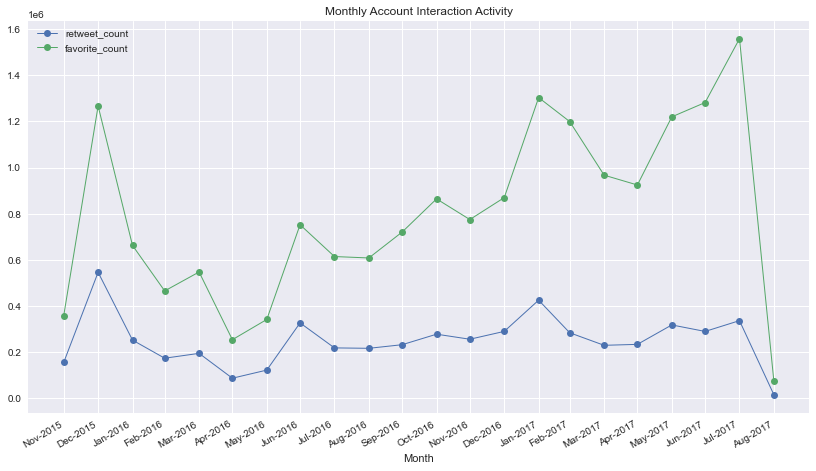

In [161]:
plt.style.use('seaborn')
rcParams['figure.figsize']=14,8
plt.plot_date('month_year', 'retweet_count',data=df,linestyle='solid', linewidth=1)
plt.plot_date('month_year', 'favorite_count',data=df,linestyle='solid', linewidth=1)
plt.xticks(df.month_year)
plt.legend()
plt.gcf().autofmt_xdate()
date_format=mpl_dates.DateFormatter('%b-%Y')
plt.gca().xaxis.set_major_formatter(date_format)
plt.xlabel('Month')
plt.title('Monthly Account Interaction Activity');

The second visual is used to check the account engagement by counting the number of retweets and favorites per tweet per month alongside with number of tweets per month to find the relation between the account activity and its reach. The results shows that an increasing trend of account engagement with nearly constant number of tweets per month.

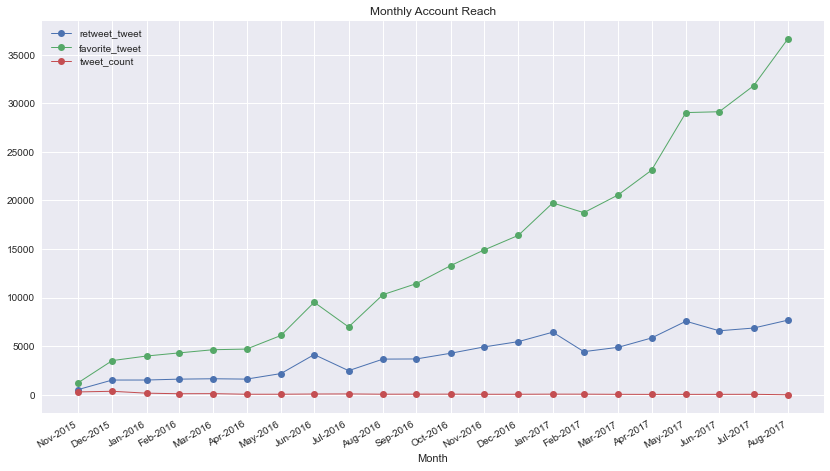

In [162]:
rcParams['figure.figsize']=14,8
plt.plot_date('month_year', 'retweet_tweet',data=df,linestyle='solid', linewidth=1)
plt.plot_date('month_year', 'favorite_tweet',data=df,linestyle='solid', linewidth=1)
plt.plot_date('month_year', 'tweet_count',data=df,linestyle='solid', linewidth=1)
plt.xticks(df.month_year)
plt.legend()
plt.gcf().autofmt_xdate()
date_format=mpl_dates.DateFormatter('%b-%Y')
plt.gca().xaxis.set_major_formatter(date_format)
plt.xlabel('Month')
plt.title('Monthly Account Reach');

<a id='analysis_image'></a>
### 6.2 Number of Images per Tweet
The aim of this analysis is two inspect the relation between the number of image(s) in each tweet and the `WeRateDogs` rating. Also, inspect this effect on the engagement of the tweets

In [163]:
df_img = analysis.groupby('img_num',as_index=False)['retweet_count','favorite_count','rating_numerator'].mean()
df_img

,img_num,retweet_count,favorite_count,rating_numerator
0,1,2575.252663,8238.042604,11.426497
1,2,3895.315789,12974.315789,11.363158
2,3,4087.423729,12654.186441,11.728814
3,4,4957.533333,16358.800000,12.400000


It is shown here that increasing the number of image up to three doesn't correlate with high dog rating. Four image tweets usually has higher rating. Meanwhile, increasing number of image has significant effect on tweets reach as shown in the below visualization

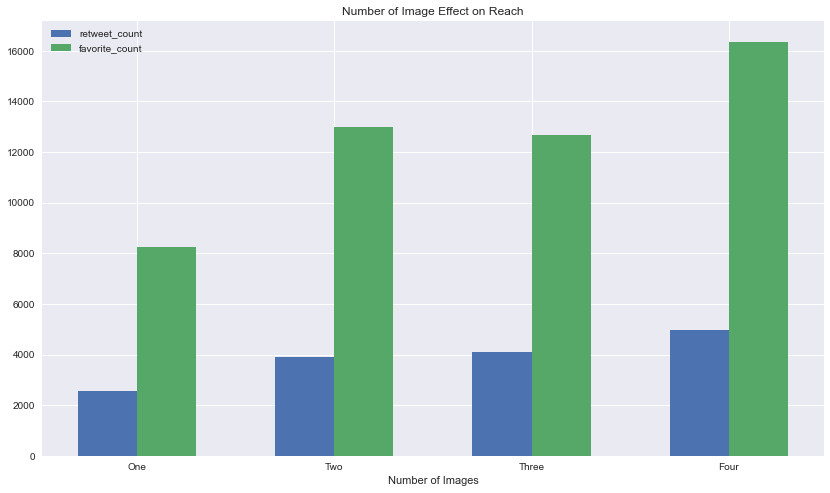

In [164]:
rcParams['figure.figsize']=14,8
w=0.3
bar1=np.arange(df_img.shape[0])
bar2 = bar1+w
plt.bar(bar1,df_img.retweet_count,w,label='retweet_count')
plt.bar(bar2,df_img.favorite_count,w,label='favorite_count')
plt.xticks((bar1+(w/2)),['One','Two','Three','Four'])
plt.legend()
plt.xlabel('Number of Images')
plt.title('Number of Image Effect on Reach');

<a id='analysis_stage'></a>
### 6.3 Dog Stage
The same previous analysis is repeated to consider dog stage effect. The tweets with dog stage identified is only considered. The effect on account rating, retweet & favorite was visually checked. The resultant is the `doggo_puppo` mixed tweets has the highest reach and rating.

In [165]:
analysis_stage=analysis[analysis.dog_stage.notnull()]
df_stage = analysis_stage.groupby('dog_stage',as_index=False)['retweet_count','favorite_count','rating_numerator'].mean()
df_stage

,dog_stage,retweet_count,favorite_count,rating_numerator
0,doggo,7125.698413,19356.380952,11.888889
1,doggo_floofer,3433.000000,17169.000000,11.000000
2,doggo_pupper,4397.250000,13219.875000,11.000000
3,doggo_puppo,19196.000000,47844.000000,13.000000
4,floofer,4968.714286,13206.000000,12.000000
5,pupper,2382.502488,7250.527363,10.638159
6,puppo,6473.954545,21582.090909,12.000000


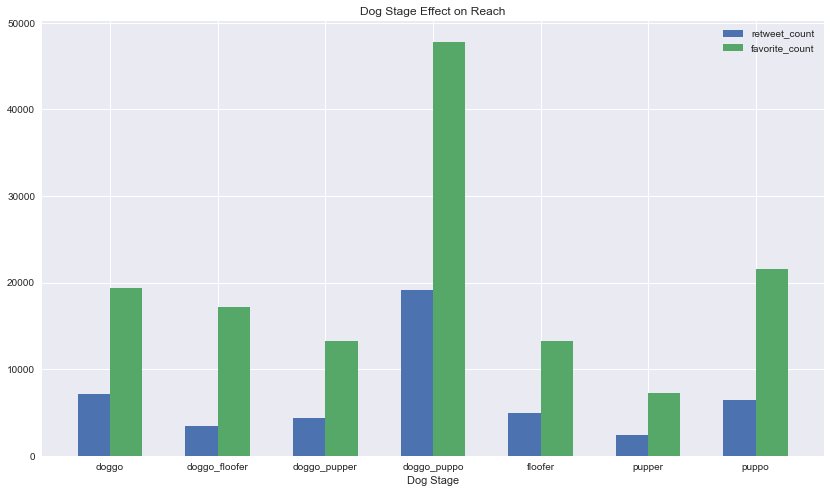

In [166]:
rcParams['figure.figsize']=14,8
w=0.3
bar1=np.arange(df_stage.shape[0])
bar2 = bar1+w
plt.bar(bar1,df_stage.retweet_count,w,label='retweet_count')
plt.bar(bar2,df_stage.favorite_count,w,label='favorite_count')
plt.xticks((bar1+(w/2)),df_stage.dog_stage)
plt.legend()
plt.xlabel('Dog Stage')
plt.title('Dog Stage Effect on Reach');

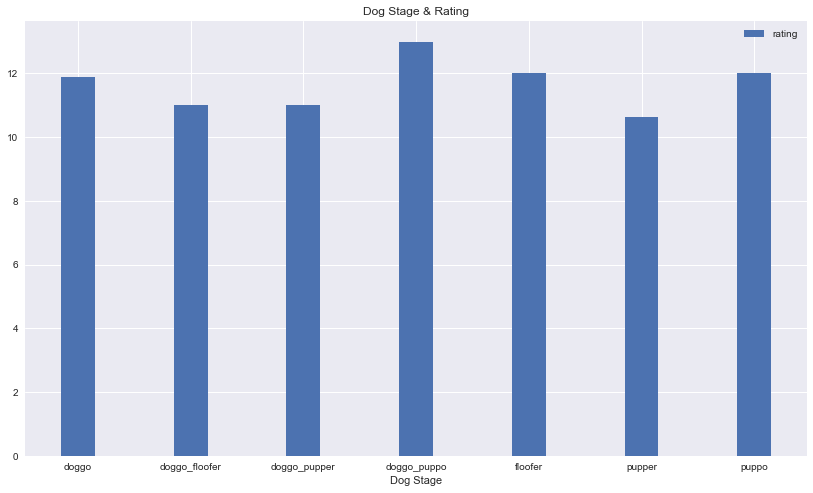

In [167]:
rcParams['figure.figsize']=14,8
w=0.3
bar1=np.arange(df_stage.shape[0])
plt.bar(bar1,df_stage.rating_numerator,w,label='rating')
plt.xticks(bar1,df_stage.dog_stage)
plt.legend()
plt.xlabel('Dog Stage')
plt.title('Dog Stage & Rating');

<a id='analysis_breed'></a>
### 6.4 Dog Breed
The same previous steps is repeated to check effect of breed of the dog. The tweets with most confident image prediction as a dog were only considered

In [168]:
analysis_breed = analysis[analysis.is_dog==True]
analysis_breed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1462 entries, 1 to 1968
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   tweet_id          1462 non-null   int64         
 1   timestamp         1462 non-null   datetime64[ns]
 2   retweet_count     1462 non-null   int64         
 3   favorite_count    1462 non-null   int64         
 4   dog_stage         227 non-null    object        
 5   text              1462 non-null   object        
 6   c_name            1067 non-null   object        
 7   rating_numerator  1462 non-null   float64       
 8   img_num           1462 non-null   int64         
 9   breed             1462 non-null   object        
 10  confidence        1462 non-null   float64       
 11  is_dog            1462 non-null   bool          
 12  month_year        1462 non-null   period[M]     
dtypes: bool(1), datetime64[ns](1), float64(2), int64(4), object(4), period[M](1)
m

In [169]:
df_breed= analysis_breed.groupby('breed',as_index=False)['retweet_count','favorite_count','rating_numerator'].mean()
df_breed

,breed,retweet_count,favorite_count,rating_numerator
0,afghan_hound,5976.000000,17326.666667,9.666667
1,airedale,1393.750000,5280.833333,9.833333
2,american_staffordshire_terrier,2204.923077,7559.538462,11.000000
3,appenzeller,1458.000000,7317.500000,11.000000
4,australian_terrier,3078.500000,11127.500000,11.500000
...,...,...,...,...
106,welsh_springer_spaniel,517.000000,2699.000000,9.000000
107,west_highland_white_terrier,1554.214286,6506.000000,10.500000
108,whippet,2298.000000,8075.111111,10.444444
109,wire-haired_fox_terrier,2923.500000,8538.500000,11.500000


Visualizing that will not be easy for the increased number of categories. Thus, only the breed that has the maximum reach and rating will be checked.

In [170]:
best_breed_retweet = df_breed[df_breed.retweet_count==df_breed.retweet_count.max()]
print(best_breed_retweet['breed'].values)

['standard_poodle']


In [171]:
best_breed_favorite= df_breed[df_breed.favorite_count==df_breed.favorite_count.max()]
print(best_breed_favorite['breed'].values)

['saluki']


In [172]:
best_breed_rating= df_breed[df_breed.rating_numerator==df_breed.rating_numerator.max()]
print(best_breed_rating['breed'].values)

['saluki']


<a id='conclusion'></a>
## 7 Conclusions
The performed analysis allowed the following insights to be identified.
- December, 2015 is the month with the highest number of total retweets per month. This is the second month after the account was created
- Since then, the account shows nearly a stable trend of number of retweets. But, the monthly count of the favorites is showing an increasing trend since June, 2016.
- The trend of the number of the count of monthly retweets and favorites per tweet is showing an increasing trend. This suggests that the account owner(s) managed to keep and increase their tweets engagement on the platform
- Increasing the number of image up to three doesn't correlate with high account dog rating. Four image tweets usually has higher rating. Meanwhile, increasing number of image has significant effect on tweets engagement, i.e. the number of retweets and favorites
- `doggo_puppo` dogs has the highest account rating and tweets engagements
- `standard_poodle` is the dog breed with the highest number of retweets
- `saluki` is the dog breed with highest number of favorites and `WeRateDogs` account rating